# Welcome to our stock prediction notebook!
# In this notebook we are trying to predict closing price of the DJIA stock using the last 59 stock data and the opening price of the day from Yahoo Finance, and also the top 25 rated news of the current day from Reddit WorldNews Channel.

# The matirials for this project was taken from kaggle: https://www.kaggle.com/aaron7sun/stocknews?select=Combined_News_DJIA.csv
 
# In the next cell we are importing the libraries that we using in this project to manipulate the data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# In the next cell we importing the data from our github project: https://github.com/Eliot100/DJIA-stock-project

In [ ]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')

# In the cell below we copying the stock data, and normalize it.

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_DJIA2 = df_DJIA.copy()
df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = \
  scaler.fit_transform(df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']])
  
df_DJIA2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995
2,2016-06-29,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995
3,2016-06-28,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554
4,2016-06-27,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745


# In the cell below we recognize the data. Every line contains stock data of 60 days in a row, the date of the stock data last day and top 25 rated news this day.

In [ ]:
df_Combined = df_DJIA2.copy()
for i in range(0,59):
  df_Combined[str(i+1)+" day before Open"] = ""
  df_Combined[str(i+1)+" day before High"] = ""
  df_Combined[str(i+1)+" day before Low"] = ""
  df_Combined[str(i+1)+" day before Close"] = ""
  df_Combined[str(i+1)+" day before Volume"] = ""
  df_Combined[str(i+1)+" day before Adj Close"] = ""

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for j in range(0, df_DJIA2.shape[0]-59):
  for i in range(0, 59):
    df_Combined[str(i+1)+" day before Open"][j] = df_Combined["Open"][j+i+1]
    df_Combined[str(i+1)+" day before High"][j] = df_Combined["High"][j+i+1]
    df_Combined[str(i+1)+" day before Low"][j] = df_Combined["Low"][j+i+1]
    df_Combined[str(i+1)+" day before Close"][j] = df_Combined["Close"][j+i+1]
    df_Combined[str(i+1)+" day before Volume"][j] = df_Combined["Volume"][j+i+1]
    df_Combined[str(i+1)+" day before Adj Close"][j] = df_Combined["Adj Close"][j+i+1]

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for i in range(0, df_DJIA2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined["Date"][i]]["News"].to_numpy()
  for j in range(0, News_Date_array.shape[0]):
    df_Combined["Top"+str(j+1)][i] = News_Date_array[j]

df_Combined = df_Combined[:-59]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [ ]:
df_Combined.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan'

# In the two cells below we importing the library nltk and through it we convert the news to numerical value between 1 to -1 according to how much is good or bad.

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sna = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df_Combined2 = df_Combined.copy()
for i in range(0, df_Combined2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined2["Date"][i]]["News"].to_numpy()

  for j in range(0, 25):
    df_Combined2["Top"+str(j+1)][i] = sna.polarity_scores(df_Combined2["Top"+str(j+1)][i])["compound"]
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# In the cell below we divide the data to training, testing, x and y. for the learning processes



In [ ]:
df_final = df_Combined2.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
X_df = df_final.drop(['Close'], axis=1)
Y_df = df_final['Close']
rowsSize = X_df.shape[0]
test_size = 0.2
train_rowsSize = rowsSize*(1-test_size)
test_rowsSize = rowsSize*test_size
x_train, x_test, y_train, y_test = (X_df.tail(int(train_rowsSize)), X_df.head(int(test_rowsSize)), Y_df.tail(int(train_rowsSize)), Y_df.head(int(test_rowsSize)))
data_x_train = x_train.copy()
data_y_train = np.array(y_train.copy(), ndmin=2).reshape((y_train.shape[0], 1))
data_x_test = x_test.copy()
data_y_test = np.array(y_test.copy(), ndmin=2).reshape((y_test.shape[0], 1))
data_test_dates = df_Combined2['Date'].head(int(test_rowsSize))
opening_price_test = data_x_test.copy()['Open']
meanCloseing = df_DJIA['Close'].mean()

# In the cell below we importing the libraries that creating ours models, visualize ours results and displaying the time it took to train the models.

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  
import matplotlib.pyplot as plt
%matplotlib inline
import time

# In the cells below we:
# 1) prepering our linear-regresion model
# 2) training our linear-regresion model
# 3) displaying the mean squared error progress graph
# 4) displaying the results of our linear-regresion model with the real testing values.

In [24]:
start_time = time.time()
features = x_train.shape[1]
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [25]:
train_losses = []
test_losses = []
temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
i = 0
print('iter:', i,', loss:', temp_loss)
while(True):
    sess.run(update, feed_dict = {x:data_x_train, y_:data_y_train})
    i += 1
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i,', loss:', temp_loss)
    if (i > 5):
      if (test_losses[-2] - test_losses[-1] < 0):
        break

iter: 0 , loss: 0.7480454
iter: 1 , loss: 0.72877836
iter: 2 , loss: 0.7100045
iter: 3 , loss: 0.6917115
iter: 4 , loss: 0.67388713
iter: 5 , loss: 0.65651923
iter: 6 , loss: 0.6395967
iter: 7 , loss: 0.623108
iter: 8 , loss: 0.60704213
iter: 9 , loss: 0.5913884
iter: 10 , loss: 0.5761364
iter: 11 , loss: 0.56127596
iter: 12 , loss: 0.5467971
iter: 13 , loss: 0.5326901
iter: 14 , loss: 0.51894563
iter: 15 , loss: 0.5055544
iter: 16 , loss: 0.4925075
iter: 17 , loss: 0.47979623
iter: 18 , loss: 0.46741197
iter: 19 , loss: 0.45534647
iter: 20 , loss: 0.44359162
iter: 21 , loss: 0.4321395
iter: 22 , loss: 0.42098257
iter: 23 , loss: 0.4101131
iter: 24 , loss: 0.39952394
iter: 25 , loss: 0.38920796
iter: 26 , loss: 0.37915817
iter: 27 , loss: 0.3693678
iter: 28 , loss: 0.35983026
iter: 29 , loss: 0.35053915
iter: 30 , loss: 0.34148818
iter: 31 , loss: 0.3326712
iter: 32 , loss: 0.32408231
iter: 33 , loss: 0.3157157
iter: 34 , loss: 0.30756566
iter: 35 , loss: 0.2996267
iter: 36 , loss: 0.2

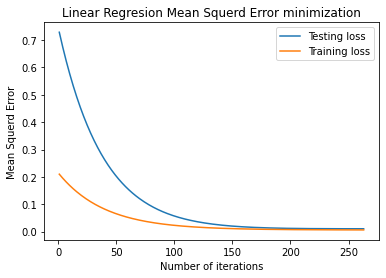

In [26]:
iter = np.arange(1,len(test_losses)+1)
plt.title('Linear Regresion Mean Squerd Error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

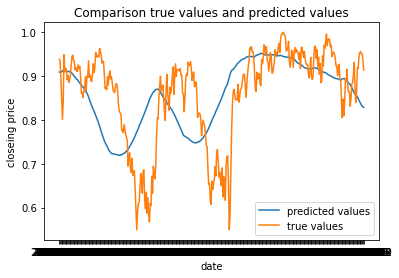

In [27]:
predicted_values = sess.run(y, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.show()

In [ ]:
 print("get to model :linear regrression training :' %s seconds " % (time.time() - start_time))

In [122]:
start_time = time.time()
step_size = 0.005
(hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (300, 1, 1, 1, 1 )

for _ in [1,2]:
  minVal=-0.0001
  maxVal=0.0001

  x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
  y_ = tf.placeholder(tf.float32, shape=[None, 1])

  W1 = tf.Variable(tf.random.uniform(shape=[x_train.shape[1], hidden1_size], minval=minVal, maxval=maxVal))
  b1 = tf.Variable(tf.random.uniform(shape=[hidden1_size], minval=minVal, maxval=maxVal))
  z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

  W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
  b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))
  # z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

  # W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
  # b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
  # z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

  # W4 = tf.Variable(tf.random.uniform([hidden3_size, hidden4_size], minval=minVal, maxval=maxVal))
  # b4 = tf.Variable(tf.random.uniform(shape=[hidden4_size], minval=minVal, maxval=maxVal))
  # z4 = tf.nn.relu(tf.matmul(z3,W4)+b4)

  # W5 = tf.Variable(tf.random.uniform([hidden4_size, hidden5_size], minval=minVal, maxval=maxVal))
  # b5 = tf.Variable(tf.random.uniform(shape=[hidden5_size], minval=minVal, maxval=maxVal))
  # z5 = tf.nn.relu(tf.matmul(z4,W5)+b5)

  # W6 = tf.Variable(tf.random.uniform([hidden5_size, 1], minval=minVal, maxval=maxVal))
  # b6 = tf.Variable(tf.random.uniform(shape=[1], minval=minVal, maxval=maxVal))

  predict = tf.matmul(z1,W2) + b2
  # predict = tf.matmul(z2,W3) + b3
  # predict = tf.matmul(z3,W4) + b4
  # predict = tf.matmul(z4,W5) + b5
  # predict = tf.matmul(z5,W6) + b6

  loss = tf.reduce_mean(tf.pow(predict - y_, 2))
  train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

  init = tf.global_variables_initializer()
  sess = tf.Session()
  train_losses = []
  test_losses = []
  sess.run(init)
i = 0

In [123]:
for _ in range(40):
  for _ in range(10):
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})

  temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
  train_losses.append(temp_loss)
  temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
  test_losses.append(temp_loss)
  print('iter:', i+1,', loss:', temp_loss)
  i += 1
# if(test_losses[-2] - test_losses[-1] <= 0):
#   break
print("get to model :nuriel network training :' %s seconds "  % (time.time() - start_time))

iter: 1 , loss: 0.74394655
iter: 2 , loss: 0.74037683
iter: 3 , loss: 0.7371529
iter: 4 , loss: 0.7342379
iter: 5 , loss: 0.7315981
iter: 6 , loss: 0.7292013
iter: 7 , loss: 0.7270168
iter: 8 , loss: 0.7250126
iter: 9 , loss: 0.72315407
iter: 10 , loss: 0.72140145
iter: 11 , loss: 0.71970505
iter: 12 , loss: 0.7179994
iter: 13 , loss: 0.716194
iter: 14 , loss: 0.7141588
iter: 15 , loss: 0.7117044
iter: 16 , loss: 0.7085504
iter: 17 , loss: 0.70428145
iter: 18 , loss: 0.6982843
iter: 19 , loss: 0.6896645
iter: 20 , loss: 0.67714334
iter: 21 , loss: 0.65895873
iter: 22 , loss: 0.63282114
iter: 23 , loss: 0.59604627
iter: 24 , loss: 0.5460586
iter: 25 , loss: 0.48146376
iter: 26 , loss: 0.40362197
iter: 27 , loss: 0.31795347
iter: 28 , loss: 0.23350342
iter: 29 , loss: 0.15991315
iter: 30 , loss: 0.103370115
iter: 31 , loss: 0.06467874
iter: 32 , loss: 0.040611625
iter: 33 , loss: 0.026645387
iter: 34 , loss: 0.018889217
iter: 35 , loss: 0.014684882
iter: 36 , loss: 0.012437297
iter: 37 ,

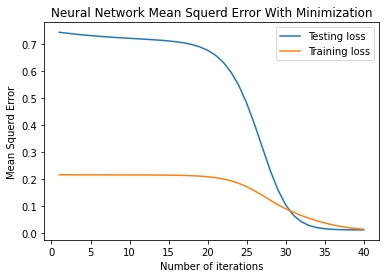

In [124]:
# Visualize data to graph  
iter = np.arange(1,len(test_losses)+1)
plt.title('Neural Network Mean Squerd Error With Minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

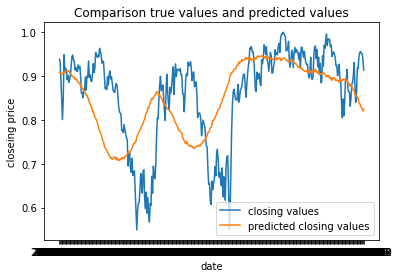

In [125]:
predicted_values = sess.run(predict, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
# plt.plot(data_test_dates, opening_price_test, label='opening values')
plt.plot(data_test_dates, data_y_test, label='closing values')
plt.plot(data_test_dates, predicted_values, label='predicted closing values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.show()

In [ ]:
print("get to model :nuriel network training :' %s seconds "  % (time.time() - start_time))

get to model :nuriel network training :' 271.2900290489197 seconds 


In [ ]:
true_loss = 

In [126]:

weight = sess.run(W1)
baieses = sess.run(b1)
# scaler.inverse_transform(weight)


In [145]:
#initialize the weights and run the nuriel network
step_size = 0.1
(hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (300, 50, 10, 10, 1 )

for _ in [1,2]:
  minVal=-0.0001
  maxVal=0.0001

  x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
  y_ = tf.placeholder(tf.float32, shape=[None, 1])

  W1 = tf.constant(weight)
  b1 = tf.constant(baieses)
  z1 = tf.nn.relu(tf.matmul(x,W1)+b1)
  W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
  b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))
  z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

  W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
  b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
  z3 = tf.nn.relu(tf.matmul(z1,W2)+b2)

  W4 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
  b4 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
  predict = tf.matmul(z3,W4) + b4
  loss = tf.reduce_mean(tf.pow(predict - y_, 2))
  train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
  init = tf.global_variables_initializer()
  sess = tf.Session()
  train_losses = []
  test_losses = []
  sess.run(init)
  i = 0
while(True):
  for _ in range(3):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)
    i += 1
  if((test_losses[-2] - test_losses[-1] <= 0) and (test_losses[-3] - test_losses[-2] <= 0)):
    break

iter: 1 , loss: 0.73981917
iter: 2 , loss: 0.7332446
iter: 3 , loss: 0.7280016
iter: 4 , loss: 0.72381675
iter: 5 , loss: 0.72047347
iter: 6 , loss: 0.7178001
iter: 7 , loss: 0.71565855
iter: 8 , loss: 0.7139367
iter: 9 , loss: 0.7125399
iter: 10 , loss: 0.71138084
iter: 11 , loss: 0.7103659
iter: 12 , loss: 0.70936984
iter: 13 , loss: 0.70818585
iter: 14 , loss: 0.7064267
iter: 15 , loss: 0.70332086
iter: 16 , loss: 0.69730747
iter: 17 , loss: 0.6852659
iter: 18 , loss: 0.66123384
iter: 19 , loss: 0.6150035
iter: 20 , loss: 0.5330865
iter: 21 , loss: 0.4087081
iter: 22 , loss: 0.26146755
iter: 23 , loss: 0.13715382
iter: 24 , loss: 0.06373478
iter: 25 , loss: 0.030825466
iter: 26 , loss: 0.01786954
iter: 27 , loss: 0.012869321
iter: 28 , loss: 0.01098537
iter: 29 , loss: 0.010443208
iter: 30 , loss: 0.010557583
iter: 31 , loss: 0.011021395
iter: 32 , loss: 0.011662125
iter: 33 , loss: 0.012399579


In [147]:
W1 = tf.Variable(weight)
b1 = tf.Variable(baieses)
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)
W2 = tf.Variable(sess.run(W2))
b2 = tf.Variable(sess.run(b2))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

W3 = tf.Variable(sess.run(W3))
b3 = tf.Variable(sess.run(b3))
predict = tf.matmul(z2,W3) + b3
loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
step_size = 0.001

In [155]:
step_size = 0.00001
while(True):
  for _ in range(50):
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
  temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
  train_losses.append(temp_loss)
  temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
  test_losses.append(temp_loss)
  print('iter:', i+1,', loss:', temp_loss)
  i += 1
  if((test_losses[-2] - test_losses[-1] <= 0)): # and (test_losses[-3] - test_losses[-2] <= 0)):
    break
print("get to model :nuriel network training :' %s seconds "  % (time.time() - start_time))

iter: 141 , loss: 0.0020018446
iter: 142 , loss: 0.0019971405
iter: 143 , loss: 0.001992405
iter: 144 , loss: 0.0019877017
iter: 145 , loss: 0.0019831688
iter: 146 , loss: 0.0019786519
iter: 147 , loss: 0.0019741317
iter: 148 , loss: 0.0019696513
iter: 149 , loss: 0.00196537
iter: 150 , loss: 0.0019612273
iter: 151 , loss: 0.0019568526
iter: 152 , loss: 0.0019524073
iter: 153 , loss: 0.001948086
iter: 154 , loss: 0.0019438994
iter: 155 , loss: 0.0019398592
iter: 156 , loss: 0.0019357931
iter: 157 , loss: 0.0019317368
iter: 158 , loss: 0.0019277306
iter: 159 , loss: 0.0019237745
iter: 160 , loss: 0.0019195816
iter: 161 , loss: 0.0019155778
iter: 162 , loss: 0.0019118299
iter: 163 , loss: 0.0019079159
iter: 164 , loss: 0.0019040806
iter: 165 , loss: 0.001900311
iter: 166 , loss: 0.0018968014
iter: 167 , loss: 0.0018929514
iter: 168 , loss: 0.001889154
iter: 169 , loss: 0.0018851459
iter: 170 , loss: 0.0018813062
iter: 171 , loss: 0.0018776399
iter: 172 , loss: 0.0018739287
iter: 173 , lo

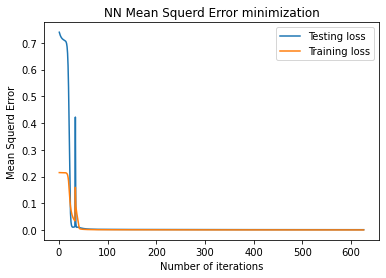

In [156]:
# Visualize data to graph  
iter = np.arange(1,len(test_losses)+1)
plt.title('NN Mean Squerd Error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

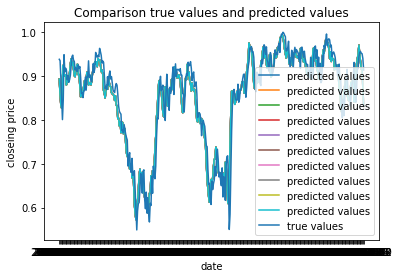

In [157]:
predicted_values = sess.run(predict, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.show()